## Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [85]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1. Employees with higher satisfaction level are more tending to retain the job
2. Last Evaluation doesn't matter that much thus idnored
3. number_project doesn't affect that much
4. Guyz who have more average_monthly_hours are more likely to leave the firm.
5. time_spend_company also doesn't affect that much
6. High Work_accident people are more likely to stay.
7. guyz who don't have promotion in last 5 years are more likely to leave.

In [86]:
df.left.unique()

array([1, 0], dtype=int64)

In [87]:
departmentWiseRetention = df.groupby(['Department','left']).size().reset_index().rename(columns={0:'Count'})
departmentWiseRetention

,Department,left,Count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


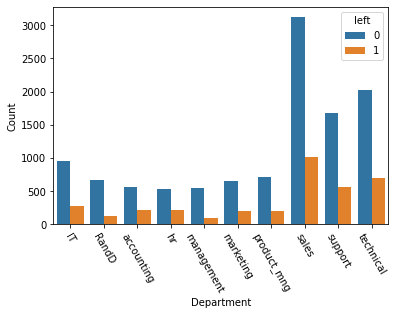

In [88]:
sns.barplot(x='Department',y='Count',data=departmentWiseRetention,hue='left',)
plt.xticks(rotation=300)
plt.show()

**Observation**: Department doesn't affect that much in the retention of employees.

In [89]:
salaryWiseRetention = df.groupby(['salary','left']).size().reset_index().rename(columns={0:'Count'})
salaryWiseRetention

,salary,left,Count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


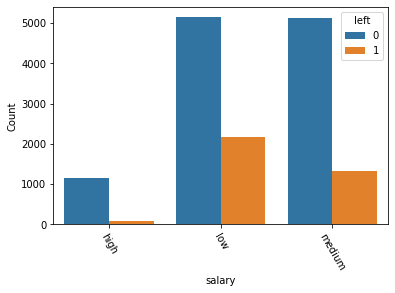

In [90]:
sns.barplot(x='salary',y='Count',data=salaryWiseRetention,hue='left',)
plt.xticks(rotation=300)
plt.show()

**Observation**: Peeps with higher salary are more prone to retain the job

In [91]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [92]:
df.drop(['Department','last_evaluation','number_project','time_spend_company'],axis='columns',inplace = True)
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary
0,0.38,157,0,1,0,low
1,0.80,262,0,1,0,medium
2,0.11,272,0,1,0,medium
3,0.72,223,0,1,0,low
4,0.37,159,0,1,0,low
...,...,...,...,...,...,...
14994,0.40,151,0,1,0,low
14995,0.37,160,0,1,0,low
14996,0.37,143,0,1,0,low
14997,0.11,280,0,1,0,low


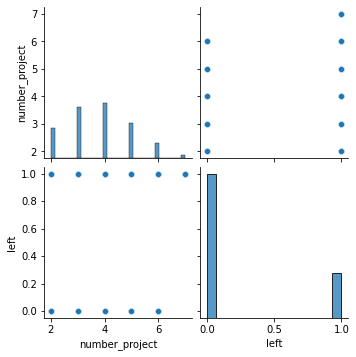

In [59]:
sns.pairplot(df[['number_project','left']])

In [93]:
##Labelling Salary
dummies = pd.get_dummies(df['salary'],drop_first=True)

In [94]:
df = pd.concat([df,dummies],axis = 'columns')
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary,low,medium
0,0.38,157,0,1,0,low,1,0
1,0.80,262,0,1,0,medium,0,1
2,0.11,272,0,1,0,medium,0,1
3,0.72,223,0,1,0,low,1,0
4,0.37,159,0,1,0,low,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,low,1,0
14995,0.37,160,0,1,0,low,1,0
14996,0.37,143,0,1,0,low,1,0
14997,0.11,280,0,1,0,low,1,0


In [97]:
df.drop('salary',axis = 'columns',inplace = True)
df

KeyError: "['salary'] not found in axis"

In [104]:
X = df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','low','medium']]
y = df.left

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [114]:
X_train.values

array([[5.50e-01, 1.51e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [5.80e-01, 1.31e+02, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [7.20e-01, 1.46e+02, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [7.50e-01, 2.67e+02, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [9.10e-01, 1.58e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.80e-01, 1.54e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [115]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
model.score(X_test,y_test)

0.7913333333333333